<a href="https://www.kaggle.com/code/bhavsarshivani/customer-clustering-with-dbscan-part-3?scriptVersionId=111059464" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div align="center" style="color:white;
           background-color:#0D5784;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Clustering with Hierarchical , K-Means , DBSCAN </center>
<p style="padding: 5px;color:white;"> 
    </p>    
  </div>

<div align="center" style="color:white;
           background-color:#852332FF;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> PART 3 : Clustering with DBSCAN  </center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div>

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../input/customer-clustering/segmentation data.csv",index_col=0)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


* Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

* You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

## Data Description:
-----

>The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 										


### Data dictionary:

ID

* numerical
* unique identifier of each customer

Sex

* categrical
* 0: male, 1: female

Marital status

* categorical
* 0: single, 1: non-single (divorced, separated, married, widowed)

Age

* numerical
* age in years

Education

* categorical
* 0: other/unknown, 1: high school, 2: university, 3: graduate school

Income

* numerical
* annual income in USD
* Occupation

categorical

* 0: unemployed/unskilled,
* 1: skilled employee/official, 
* 2: management/self-employed/highly qualified employed/officer

Settlement size

* categorical
* 0: small city, 1: mid-sized city, 2: big city

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center>DBSCAN </center>
<p style="padding: 5px;color:white;"> 
    </p>    
  </div>
   


>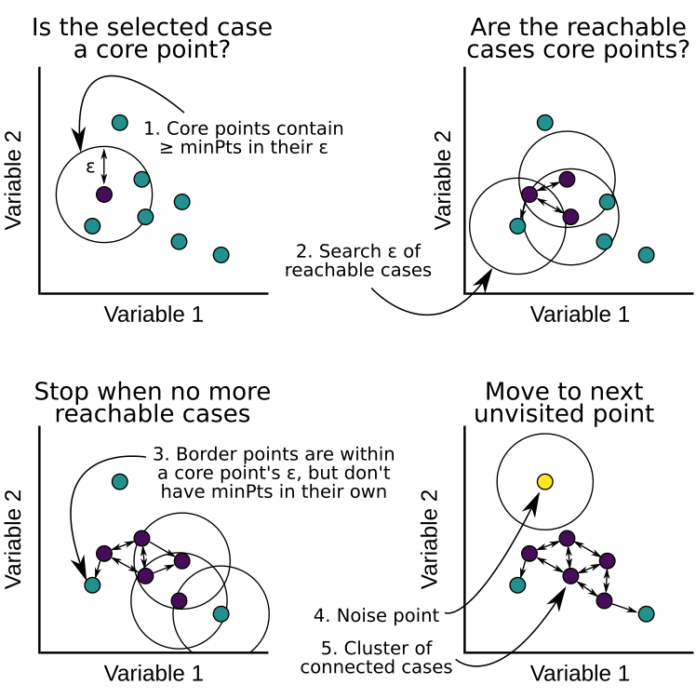

In [5]:
#creating a copy
data_db = df.copy()

In [6]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_db = scaler.fit_transform(data_db.iloc[:,1:])
scaled_data_db

array([[-0.99302433,  2.65361447,  1.60432297,  0.09752361,  0.29682303,
         1.552326  ],
       [ 1.00702467, -1.18713209, -0.06337243,  0.78265438,  0.29682303,
         1.552326  ],
       [-0.99302433,  1.11731585, -0.06337243, -0.83320224, -1.26952539,
        -0.90972951],
       ...,
       [-0.99302433, -0.41898277, -1.73106782, -0.90695688, -1.26952539,
        -0.90972951],
       [ 1.00702467, -1.01643224, -0.06337243, -0.60332923, -1.26952539,
        -0.90972951],
       [-0.99302433, -0.93108232, -1.73106782, -1.3789866 , -1.26952539,
        -0.90972951]])

### Finding the Optimal value of Epsilon

>Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.


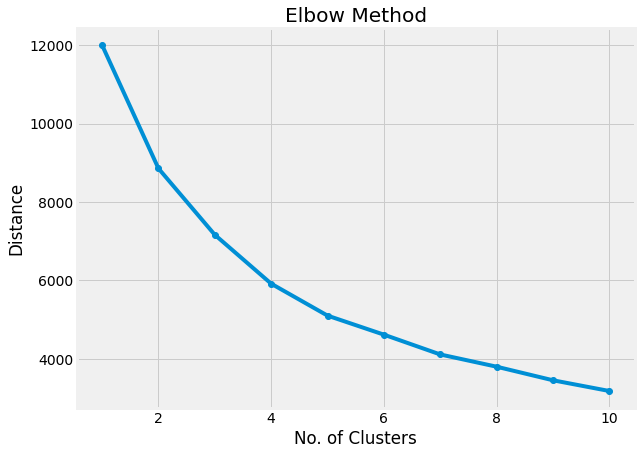

In [7]:
plt.figure(figsize=(10,7))
SSE = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(scaled_data_db)
  SSE.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),SSE, marker = "o")
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Distance")
plt.show()

In [8]:
!pip install kneed

In [9]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
kl.elbow

4

In [10]:
#creating clusters
dbscan = DBSCAN(eps=4, min_samples=11)
dbscan.fit(scaled_data_db)

DBSCAN(eps=4, min_samples=11)

In [11]:
#assigning the clusters to the datset
data_db["cluster_db"] = dbscan.labels_
data_db.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_db
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,0
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,0
100000005,0,0,53,1,149031,1,1,0


In [12]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

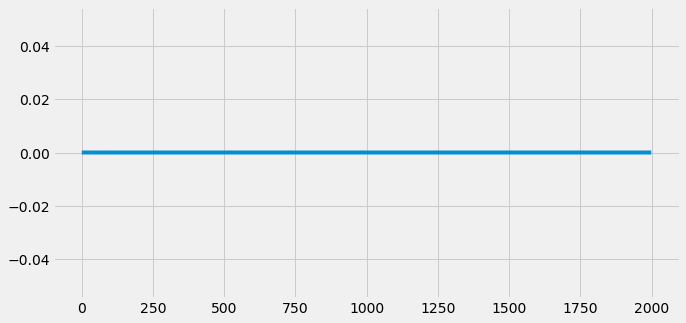

In [13]:
plt.figure(figsize=(10,5))
plt.plot(dbscan.labels_)
plt.show()

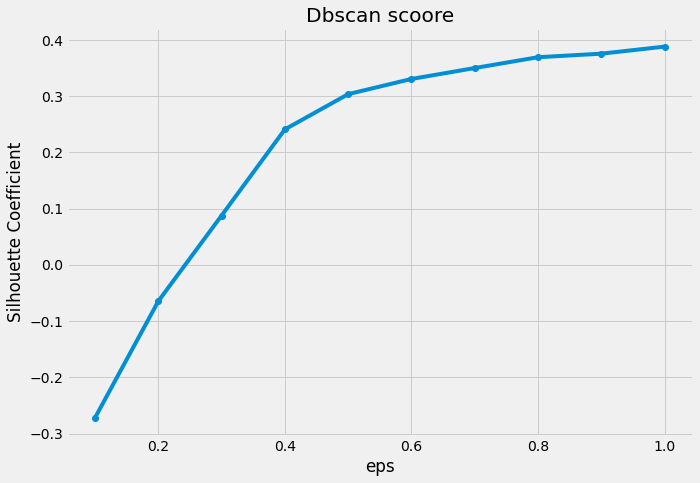

In [14]:
plt.figure(figsize=(10,7))
dbscan_scores = []
dbscan_index =  np.arange(0.1, 1.1, 0.1)
for i in dbscan_index:
  dbscan = DBSCAN(eps=i, min_samples=11)
  labels = dbscan.fit_predict(scaled_data_db)
  dbscan_scores.append(silhouette_score(scaled_data_db, labels))

plt.style.use("fivethirtyeight")
plt.plot(dbscan_index,dbscan_scores , marker = "o")
plt.title("Dbscan scoore")
plt.xlabel("eps")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [15]:
data_db["cluster_db"].value_counts()

0    2000
Name: cluster_db, dtype: int64

In [16]:
#creating dataframe for plot
counts = pd.DataFrame({"Cluster_No" : [-1,0,1,2], "cluster_db" : [23,3934,15,23]})
counts

,Cluster_No,cluster_db
0,-1,23
1,0,3934
2,1,15
3,2,23


<BarContainer object of 4 artists>

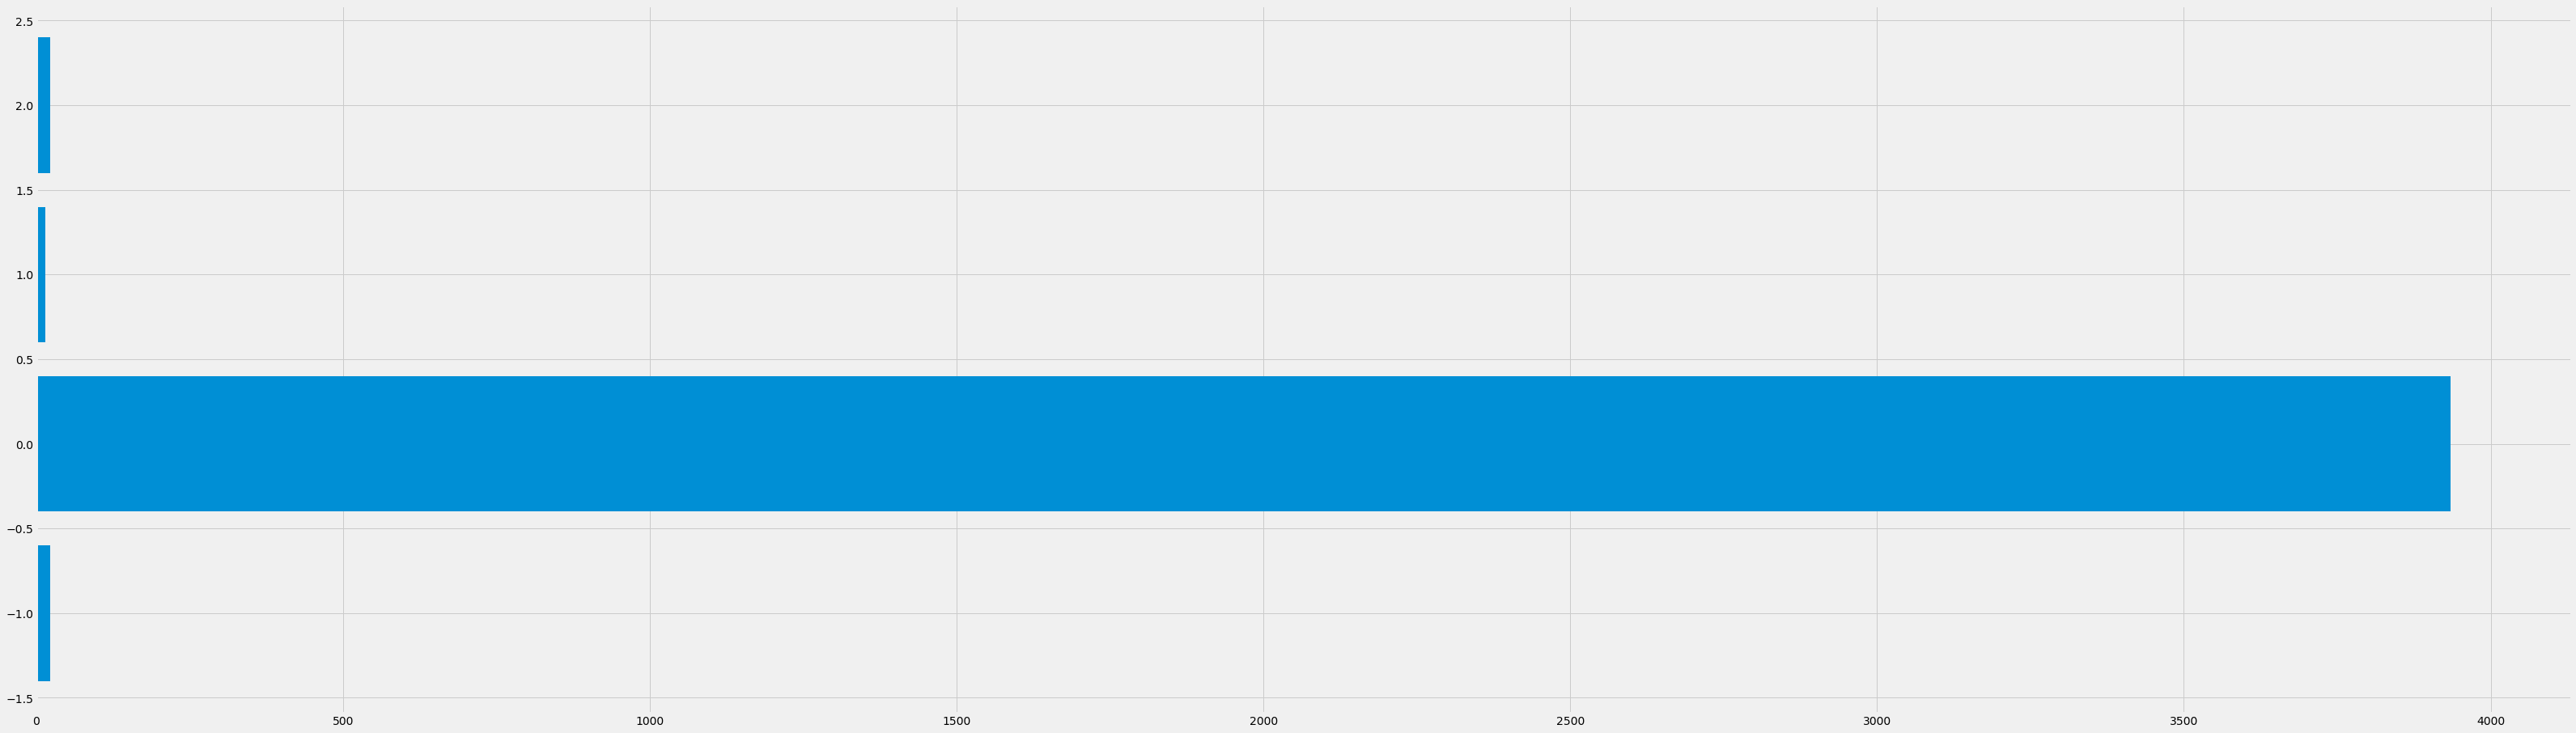

In [17]:
plt.figure(figsize=(50,15))
plt.barh(counts["Cluster_No"], counts["cluster_db"])

In [18]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 26


In [19]:
# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 177


> The DBSCAN has created 3 clusters, and the cluster with -1 label represents the noisy datapoints.

In [20]:
df_clustered3 = data_db.sort_values("cluster_db")
df_clustered3.iloc[:,[-1]]

,cluster_db
ID,
100000001,0
100001342,0
100001341,0
100001340,0
100001339,0
...,...
100000660,0
100000659,0
100000658,0


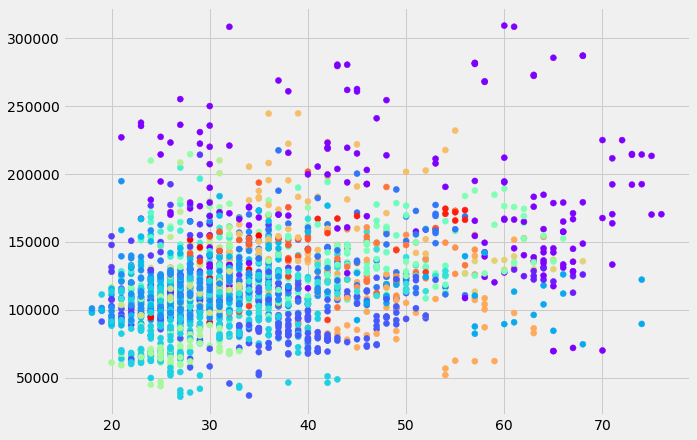

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data_db['Age'],data_db['Income'],c=dbscan.labels_,cmap='rainbow')

<div align="center" style="color:white;
           background-color:#16507F;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
   <center>⪻◥◤◢◣⚜Thank You⚜◥◤◢◣⪼</center>
<p style="padding: 5px;color:white;">
     </p>
    </div>